49
藥吃完還睡不著怎辦？自己加藥？變頻冷氣哪家強?中國古拳法實戰性高嗎小英授權郭董、台積電　國台辦：迴避復星進黨擋疫苗、擋3+11 擋高端公開(統計表格你各位下次投胎想選什麼國家為何戰地風雲4不敢把戰場設台灣臺北晚上怎麼變這麼多送修AMD處理器搞得跟買疫苗一樣女生不生小孩，為什麼不用課稅？八卦板板規(2021.05.11)6/12 早上7:50分 高雄88橋下行車紀錄器6/12早上9點北市忠孝東路與金山南路口團結防疫的六月份置底閒聊區6/17上午高雄七賢一路事故行車紀錄器 為什麼沒什麼新聞在民進黨各種否決？進黨擋疫苗、擋3+11 擋高端公開外國的民主國家有沒有可能獨裁?高嘉瑜：清查是否有人投資高端進黨擋疫苗、擋3+11 擋高端公開謝志偉：德BNT原廠疫苗供台意願高張嘉航算好老公嗎？法律人 進來喔 刑法130條 廢弛職務釀災罪來八卦板5分鐘就受不了負面能量了正常嗎?台灣哪裡水最深的八卦？大家都躺平台灣多久會滅島？進黨擋疫苗、擋3+11 擋高端公開組長把功勞搶走了再把tvbs關台 是不是就一統有線電視台了有沒有夫妻各領到一份紓困？兒子突然說要靠下圍棋賺錢該怎麼辦AirPods和AirPods pro有什麼不一樣？進黨擋疫苗、擋3+11 擋高端公開618是京東生日 乾台灣屁事= =?授權郭台銘、台積電採購疫苗！蔡英文：越為什麼沒什麼新聞在民進黨各種否決？進黨擋疫苗、擋3+11 擋高端公開外國的民主國家有沒有可能獨裁?高嘉瑜：清查是否有人投資高端進黨擋疫苗、擋3+11 擋高端公開為什麼Dcard都看不懂反串梗啊？法律人 進來喔 刑法130條 廢弛職務釀災罪法律人 進來喔 刑法130條 廢弛職務釀災罪有沒有東京死神沒有正常發揮的八卦要怎麼憑空變出一個魚缸?華山論劍有人一直拿火槍偷射怎辦高嘉瑜：清查是否有人投資高端進黨擋疫苗、擋3+11 擋高端公開有特殊癖好的牙醫？郭台銘爭取BNT疫苗 柯建銘曝「他買的價格CNN訪高端:不知保護力能打?高端:有比沒有監察院怎麼不查3+11？進黨擋疫苗、擋3+11 擋高端公開三峽大壩若潰堤　陸40%GDP全消失、無兵可通常人民忘記一件事需要多久？是不是有股怒氣要來了嬴政怎麼統一中國的？進黨擋疫苗、擋3+11 擋高端公開醒醒吧，台灣永遠不可能獨立進黨擋疫苗、擋3+11 擋高端公開不捐了？台灣打AZ疫苗頻傳死亡　謝長廷：若買家是台積電還要排隊嗎？進

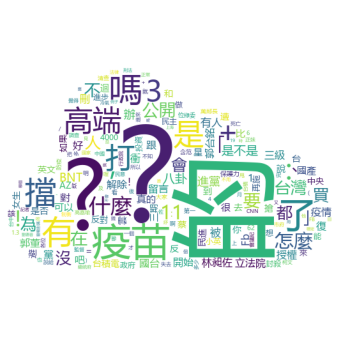

In [4]:
import jieba
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from collections import Counter

payload = {
'from': '/bbs/Gossiping/index.html',
'yes': 'yes'
}
rs = requests.session()
res = rs.post('https://www.ptt.cc/ask/over18',data = payload)

# 首頁資料
res = rs.get('https://www.ptt.cc/bbs/Gossiping/index.html')
parse = bs(res.text, "html.parser")
# print(parse)
titles = ''
# 前15筆
for entry in parse.select('.r-ent')[:15]:
    if entry.select('.title')[0].text[1] == '[':
        titles = titles + entry.select('.title')[0].text[6:-1]
    else :
        if entry.select('.title')[0].text[9:12] != "(本文" and entry.select('.title')[0].text[9:12] != "(已被":
            titles = titles + entry.select('.title')[0].text[10:-1]

# 首頁前49頁資料，每頁20筆，最後一頁5筆            
div = parse.find('div',{'class' : 'btn-group btn-group-paging'})
bar = div.select('a',{'class' : 'btn wide'})
for button in bar:
    if button.text == "‹ 上頁":
        page = int(button.get('href')[-10:-5])
        address = 'https://www.ptt.cc' + button.get('href')
num =0
for i in range(page-48, page + 1):
    num = num +1
    address = 'https://www.ptt.cc' + button.get('href')[:-5] + str(i) + button.get('href')[-5:]
    res = rs.get(address)
    parse = bs(res.text, "html.parser")
     
    for entry in parse.select('.r-ent'):
        if entry.select('.title')[0].text[1] == '[':
            titles = titles + entry.select('.title')[0].text[6:-1]
        else :
            if entry.select('.title')[0].text[9:12] != "(本文" and entry.select('.title')[0].text[9:12] != "(已被":
                titles = titles + entry.select('.title')[0].text[10:-1]
    # 最後一頁的五筆資料            
    if i == page-48:
        for entry in parse.select('.r-ent')[:5]:
                if entry.select('.title')[0].text[1] == '[':
                    titles = titles + entry.select('.title')[0].text[6:-1]
                else :
                    if entry.select('.title')[0].text[9:12] != "(本文" and entry.select('.title')[0].text[9:12] != "(已被":
                        titles = titles + entry.select('.title')[0].text[10:-1]   
print(num)
# print(titles[:1000])
# 文字雲
words = jieba.lcut(titles)
word_count3 = Counter(words)
print(word_count3)

font = 'msyh.ttc' 
mask = np.array(Image.open("cloud.png"))
wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path=font) 
wordcloud.generate_from_frequencies(frequencies=word_count3)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")